## Estadística Aplicada
Sesión 14 - 17 octubre

Joel Fayam Rivera Peña 2076323

Grupo 42

In [1]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

#Tamaño de gráfica
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12

In [5]:
# Datos
igae_deses=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

IGAE (pib mensual) desestacionalizado
*ARIMA=serie no tiene compontente estacional
*SARIMA=serie con componente estacional

In [6]:
igae_deses.head()

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451


In [7]:
# Para utilizar una serie en statsmodels se requieren de 3 requisitos
## 1. Formato de fecha
## 2. Fecha según el index
## 3. Asignar una frecuencia

igae_deses['meses']=pd.to_datetime(igae_deses['meses'],format='%Y/%m')

In [8]:
igae_deses.head(1)

,meses,IGAE_DESES
0,1993-01-01,56.28229


In [9]:
igae_deses=igae_deses.set_index('meses')
igae_deses.head()

,IGAE_DESES
meses,
1993-01-01,56.282290
1993-02-01,57.708594
1993-03-01,57.825254
1993-04-01,57.179522
1993-05-01,57.895451


In [10]:
# Asignar frecuencias
igae_deses=igae_deses.asfreq('MS')

In [11]:
igae_deses.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq='MS')

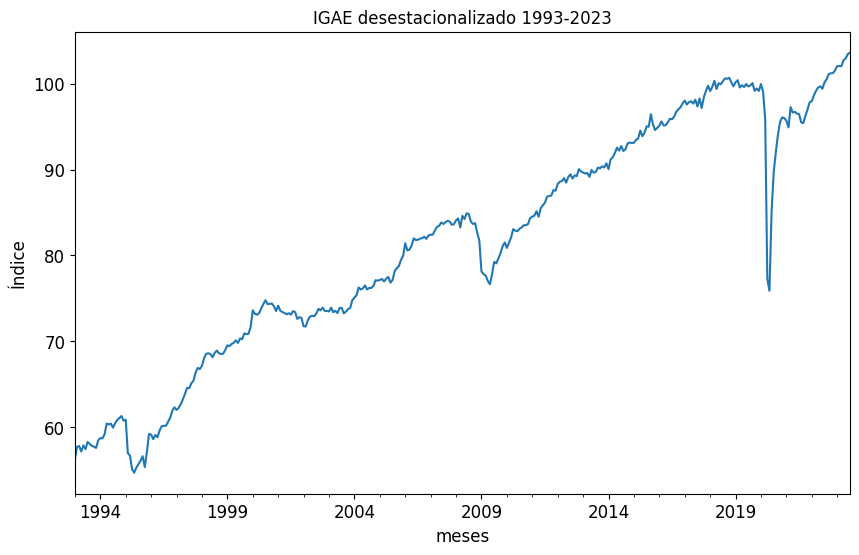

In [13]:
## Graficar la serie de tiempo
igae_deses['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('Índice')
plt.show()

El IGAE se comporta como una caminata aleatoria con deriva, sospechamos que es un proceso **no estacionario**

In [17]:
## Prueba de Dickey-Fuller aumentada
# Ho: Serie No estacionaria
# Ha: Serie estacionaria
# pvalue < alpha Rechazamos H0
prueba_DFA=adfuller(igae_deses['IGAE_DESES'])
pvalue=prueba_DFA[1]
pvalue.round(2)

0.74

Dado que el pvalue es de 0.74, no rechazamos H0. El IGAE ('IGAE_DESES') es una serie No Estacionaria

Necesitamos calcular las primeras diferencias del IGAE
$$ \Delta_t=Y_t-Y_{t-1} $$

In [18]:
## Primeras diferencias del IGAE
igae_deses['igae_diff']=igae_deses['IGAE_DESES'].diff()

In [20]:
igae_deses.head()

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929


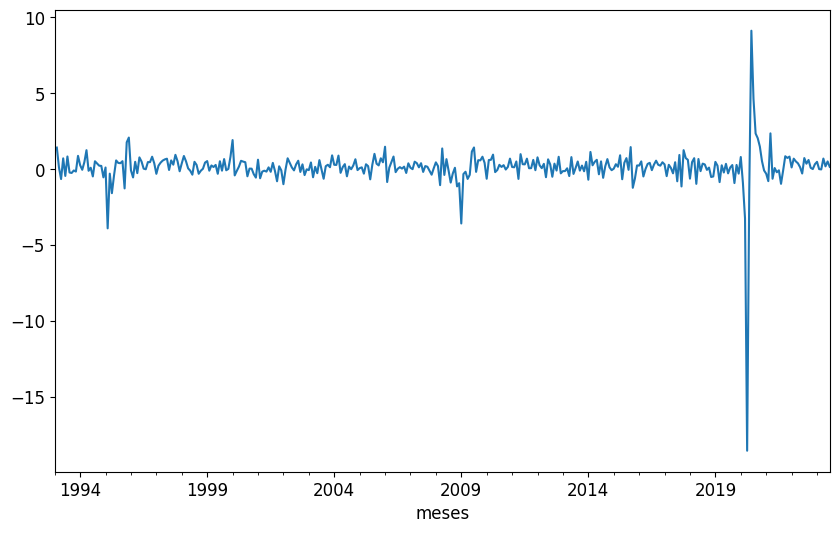

In [21]:
igae_deses['igae_diff'].plot();

In [23]:
## Prueba de Dickey-Fuller aumentada para las primeras diferencias del Igae
prueba_DFA1=adfuller(igae_deses['igae_diff'].dropna())
pvalue1=prueba_DFA1[1]
pvalue1.round(2)

0.0

El pvalue=0.0 por lo tanto rechazamos H0, las primerias diferencias del Igae ('Igae_diff') son una serie estacionaria.
* IGAE=Integrado 1
* 1ras igae=Integrado 0

Ya sabemos que las primeras diferencias del IGAE son un proceso estacionario, pero no sabemos que tipo de proceso estacionario es.

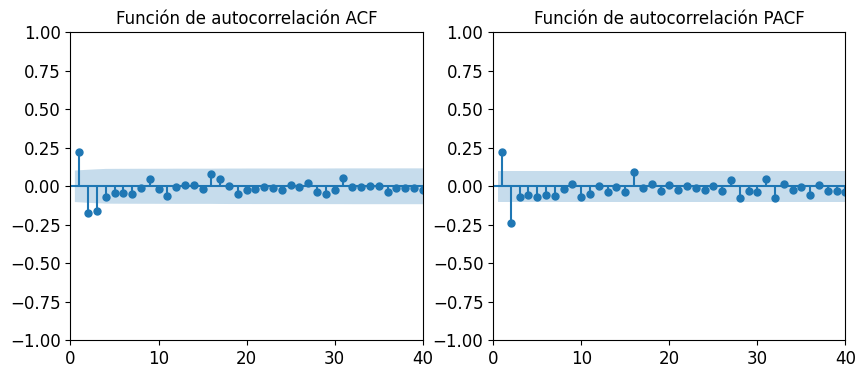

In [27]:
## Gráficas de autocorrelación
ig, ax=plt.subplots(1,2,figsize=(10,4))
## Primer subgráfica
plot_acf(igae_deses['igae_diff'].dropna(),zero=False,lags=40,ax=ax[0],title='Función de autocorrelación ACF')
ax[0].set_ylim(-1,1)
ax[0].set_xlim(0,40)
## Segunda subgráfica
plot_pacf(igae_deses['igae_diff'].dropna(),zero=False,lags=40,ax=ax[1],title='Función de autocorrelación PACF')
ax[1].set_ylim(-1,1)
ax[1].set_xlim(0,40)
plt.show()

In [37]:
# Suponer igae_diff AR(1)=ARMA(1,0)=ARIMA(1,0,0)
## Estimar ARIMA(MCO)

modelo_prueba=ARIMA(igae_deses['igae_diff'],order=(1,0,0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  367
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Tue, 17 Oct 2023   AIC                           1210.530
Time:                        15:45:28   BIC                           1222.246
Sample:                    01-01-1993   HQIC                          1215.185
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

El modelo estimado por MCO es:
$$ Y_t=0.22 Y_{t-1}+\varepsilon_t $$

In [38]:
modelo_prueba2=ARIMA(igae_deses['igae_diff'],order=(2,0,0))
resultadop2=modelo_prueba2.fit()
print(resultadop2.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  367
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -591.689
Date:                Tue, 17 Oct 2023   AIC                           1191.379
Time:                        15:45:31   BIC                           1207.000
Sample:                    01-01-1993   HQIC                          1197.585
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.110      1.179      0.238      -0.085       0.344
ar.L1          0.2747      0.027     10.270      0.000       0.222       0.327
ar.L2         -0.2367      0.017    -14.275      0.0

In [42]:
ic={}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo=ARIMA(igae_deses['igae_diff'].dropna(),order=(ar,0,ma))
        resultado=modelo.fit()
        ic[(ar,ma)]=[resultado.aic,resultado.bic]
ic=pd.DataFrame(ic,index=['AIC','BIC']).T
ic.index=ic.index.set_names(['AR','MA'])


AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4
AR: 4, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 2
AR: 5, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
ic.sort_values('AIC',).head(1)

,,AIC,BIC
AR,MA,,
3,1,1183.372566,1206.788366


Las primeras diferencias edl IGAE son un ARMA(3,1)
* Primeras diferencias ARIMA(3,0,1)
* IGAE ARIMA(3,1,1)

In [46]:
## Modelo ARIMA para el IGAE
arima_model=ARIMA(igae_deses['IGAE_DESES'],order=(3,1,1))
results=arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             IGAE_DESES   No. Observations:                  367
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -591.604
Date:                Tue, 17 Oct 2023   AIC                           1193.208
Time:                        16:02:32   BIC                           1212.721
Sample:                    01-01-1993   HQIC                          1200.962
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0175      0.232      4.384      0.000       0.563       1.472
ar.L2         -0.4222      0.072     -5.876      0.000      -0.563      -0.281
ar.L3          0.1048      0.089      1.176      0.2

ARMA(3,1)

In [47]:
## Pronosticar la serie original
igae_deses['modelo_arima']=results.predict()
igae_deses['modelo_arima'][0]=igae_deses['IGAE_DESES'][0]

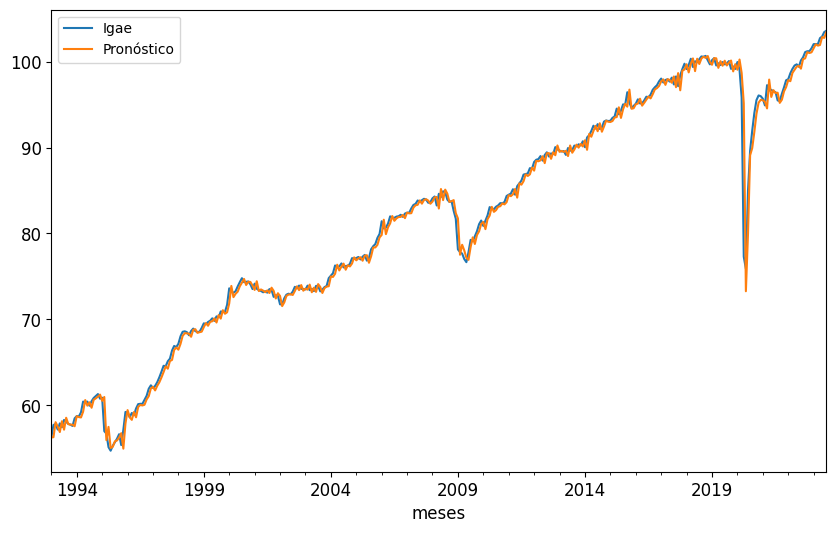

In [49]:
igae_deses['IGAE_DESES'].plot(label='Igae')
igae_deses['modelo_arima'].plot(label='Pronóstico')
plt.legend();

(600.0, 645.0)

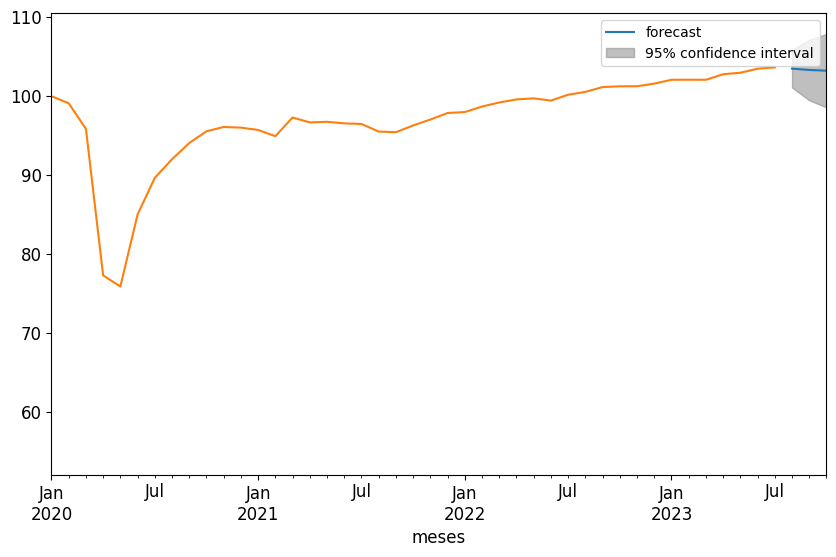

In [57]:
## Gráfica del pronóstico
plot_predict(results,start='2023-08-01',end='2023-10-01')
igae_deses['IGAE_DESES'].plot()
plt.xlim('2020-01-01','2023-10-01')

In [61]:
results.predict(start='2023-08-01',end='2023-10-01')

2023-08-01    103.443848
2023-09-01    103.275282
2023-10-01    103.184865
Freq: MS, Name: predicted_mean, dtype: float64

El pronóstico de los modelos ARIMA es de corto plazo, conforme se pronóstica más en el futuro el intervalo de confianza se hace más grande, también el pronóstico converge a una constante lo que significa que tiene muy poca capacidad de pronosticar a mediano y largo plazo. En general, se plantea que si es un ARIMA (3,1,1) pronóstica bastante bien 3 periodos futuros, si es un AIRMA(2,1,4) pronostica bien 4 periodos futuros. 

In [51]:
igae_deses.tail(1)

,IGAE_DESES,igae_diff,modelo_arima
meses,,,
2023-07-01,103.596612,0.158524,103.442199
